# 1.&nbsp; Import Libraries

In [ ]:
# For numerical operations
import numpy as np

# For data manipulation
import pandas as pd
pd.set_option('display.float_format', '{:.3f}'.format)

# Load the diabetes dataset
from sklearn.datasets import load_diabetes

# Split data into training and testing sets
from sklearn.model_selection import train_test_split

# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# For evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# 2.&nbsp;Load Dataset

In [ ]:
# Load diabetes dataset
diabetes = load_diabetes()

# Create DataFrame from the dataset
diabetes_df = pd.DataFrame(
    diabetes.data,
    columns=diabetes.feature_names
)

# Add target variable to the DataFrame
diabetes_df['target'] = diabetes.target

# Display the first few rows of the DataFrame
display(diabetes_df.head())

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038,0.051,0.062,0.022,-0.044,-0.035,-0.043,-0.003,0.020,-0.018,151.000
1,-0.002,-0.045,-0.051,-0.026,-0.008,-0.019,0.074,-0.039,-0.068,-0.092,75.000
2,0.085,0.051,0.044,-0.006,-0.046,-0.034,-0.032,-0.003,0.003,-0.026,141.000
3,-0.089,-0.045,-0.012,-0.037,0.012,0.025,-0.036,0.034,0.023,-0.009,206.000
4,0.005,-0.045,-0.036,0.022,0.004,0.016,0.008,-0.003,-0.032,-0.047,135.000


# 3.&nbsp;Exploratory Data Analysis

10 variabel dasar (fitur):
- age - umur dalam tahun
- sex - pria atau wanita
- bmi - indeks massa tubuh
- bp - tekanan darah rata-rata
- s1 - TC : kolesterol serum total
- s2 - LDL: lipoprotein densitas rendah
- s3 - HDL: lipoprotein densitas tinggi
- s4 - TCH : kolesterol total / HDL
- s5 - LTG: kemungkinan log kadar trigliserida serum
- s6 - GLU : kadar gula darah


Variable target (Y)
- Satu variabel target: ukuran kuantitatif perkembangan penyakit satu tahun setelah data dasar


## a. Dataset's Description

In [ ]:
diabetes_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000
mean,-0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,152.133
std,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048,77.093
min,-0.107,-0.045,-0.090,-0.112,-0.127,-0.116,-0.102,-0.076,-0.126,-0.138,25.000
25%,-0.037,-0.045,-0.034,-0.037,-0.034,-0.030,-0.035,-0.039,-0.033,-0.033,87.000
50%,0.005,-0.045,-0.007,-0.006,-0.004,-0.004,-0.007,-0.003,-0.002,-0.001,140.500
75%,0.038,0.051,0.031,0.036,0.028,0.030,0.029,0.034,0.032,0.028,211.500
max,0.111,0.051,0.171,0.132,0.154,0.199,0.181,0.185,0.134,0.136,346.000


## b. Dataset's Info

In [ ]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


## c. Visualization

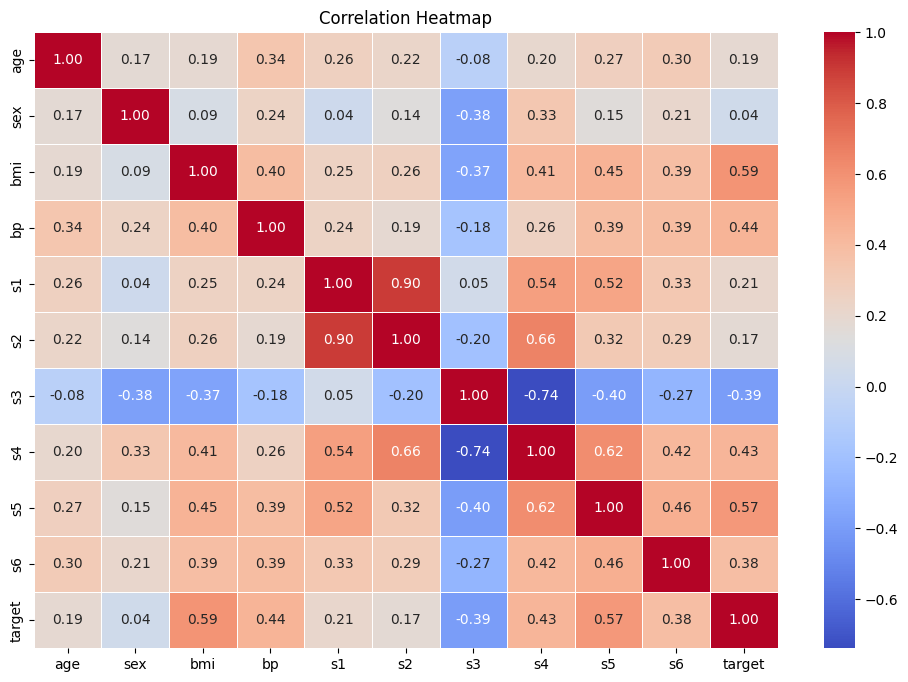

In [ ]:
# Calculate correlation matrix
correlation_matrix = diabetes_df.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f", linewidths=0.5
)
plt.title('Correlation Heatmap')
plt.show()

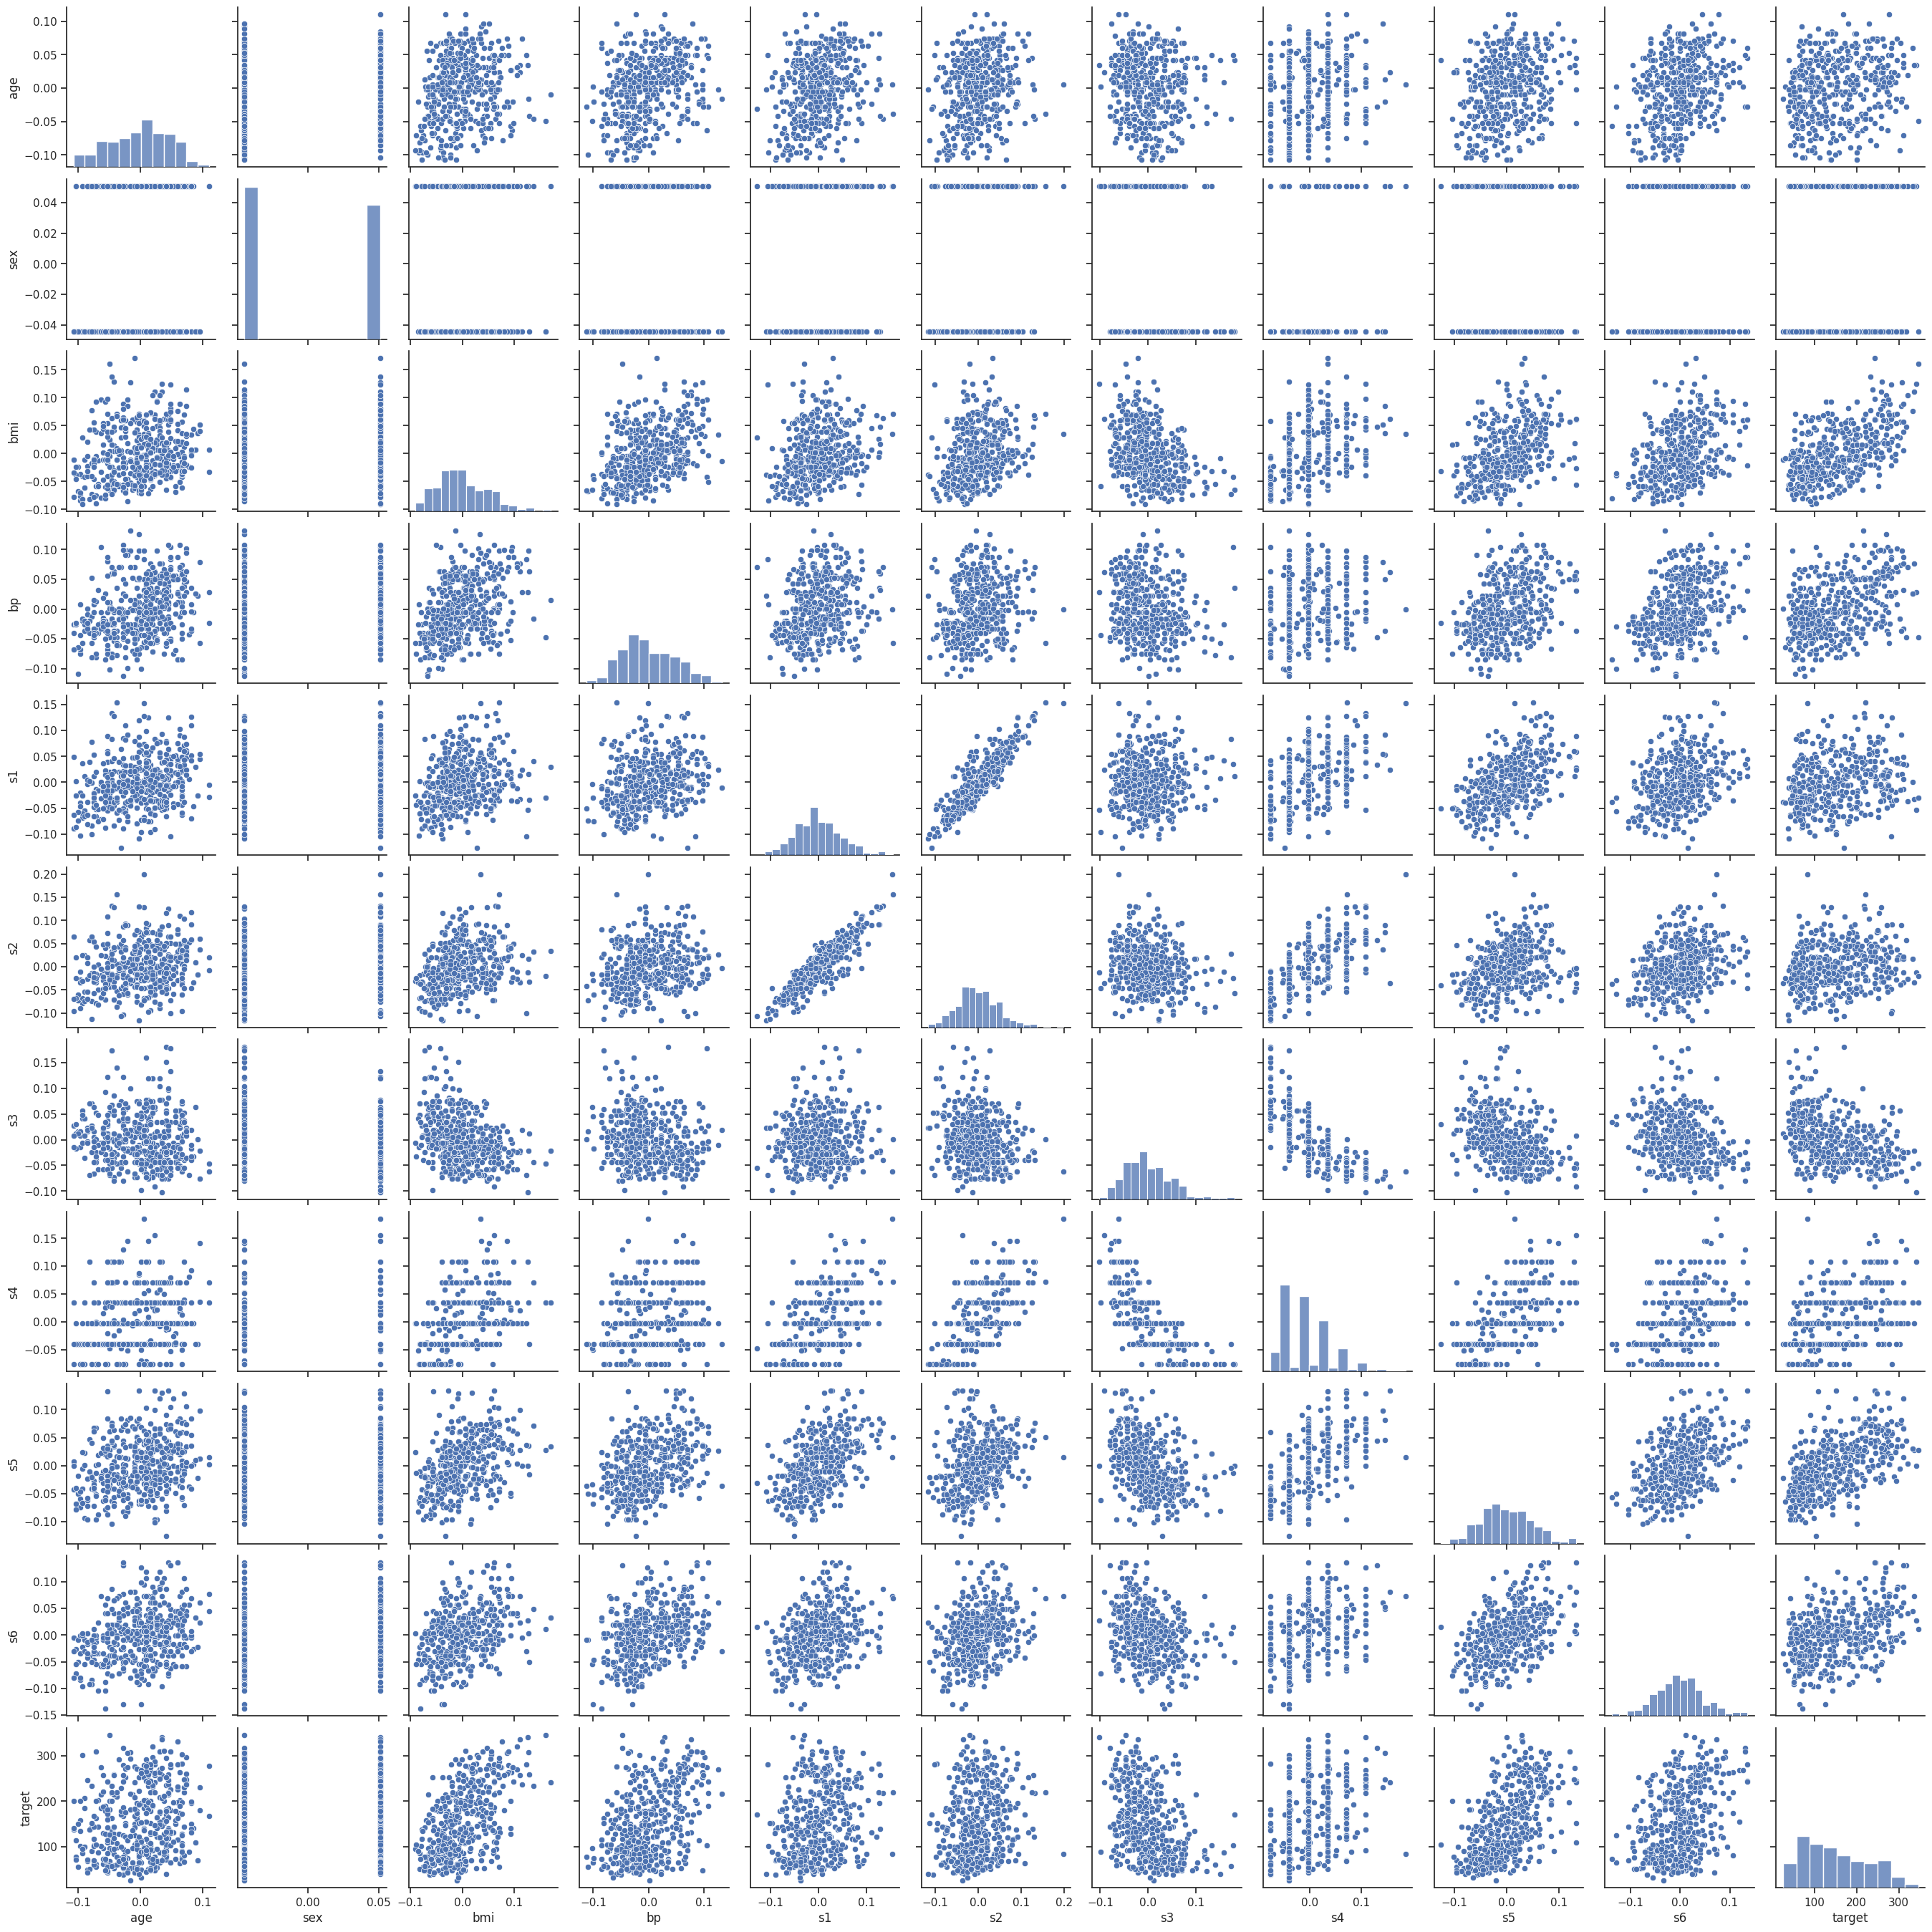

In [ ]:
# Visualize distribution of each feature
sns.set(style="ticks")
sns.pairplot(diabetes_df)
plt.show()

# 4.&nbsp;ML Modeling - Random Forest Regressor

## a. Set Predictor and Target

In [ ]:
X = diabetes_df.drop(columns='target')
y = diabetes_df.target

## b. Train-Test Split Dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

## c. Set list of n_estimators values (hyperparameter(s))

In [ ]:
n_estimators_values = [50, 100, 200]

## d. Run modeling

In [ ]:
# Dictionary to store results
results = {
    'n_estimators': [],
    'RMSE': [],
    'MAE': []
}

for n_estimators in n_estimators_values:
    # Train Random Forest Regression model
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Calculate RMSE and MAE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)

    # Store results
    results['n_estimators'].append(n_estimators)
    results['RMSE'].append(rmse)
    results['MAE'].append(mae)

## e. Model Evaluation

In [ ]:
# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Find the model with the lowest RMSE and MAE
best_rmse_model = results_df.loc[results_df['RMSE'].idxmin()]
best_mae_model = results_df.loc[results_df['MAE'].idxmin()]

display(results_df)

print("\n")
print("Model with the lowest RMSE:")
print(best_rmse_model)
print("\nModel with the lowest MAE:")
print(best_mae_model)

,n_estimators,RMSE,MAE
0,50,55.174,44.765
1,100,54.332,44.053
2,200,54.461,44.276




Model with the lowest RMSE:
n_estimators   100.000
RMSE            54.332
MAE             44.053
Name: 1, dtype: float64

Model with the lowest MAE:
n_estimators   100.000
RMSE            54.332
MAE             44.053
Name: 1, dtype: float64


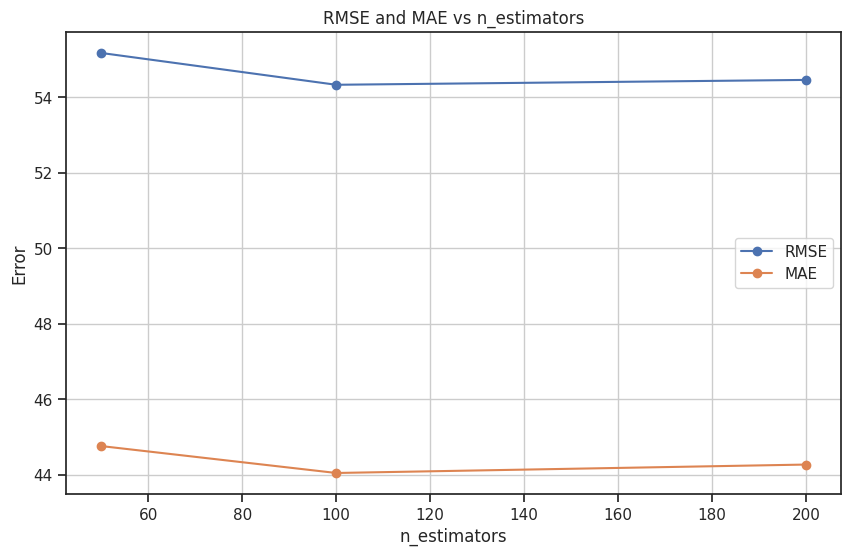

In [ ]:
# Plot RMSE and MAE results
plt.figure(figsize=(10, 6))

plt.plot(
    results_df['n_estimators'],
    results_df['RMSE'],
    marker='o',
    label='RMSE'
)

plt.plot(
    results_df['n_estimators'],
    results_df['MAE'],
    marker='o',
    label='MAE'
)

plt.title('RMSE and MAE vs n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()

n_estimator terbaik adalah 100

# 5.&nbsp;Model Inference

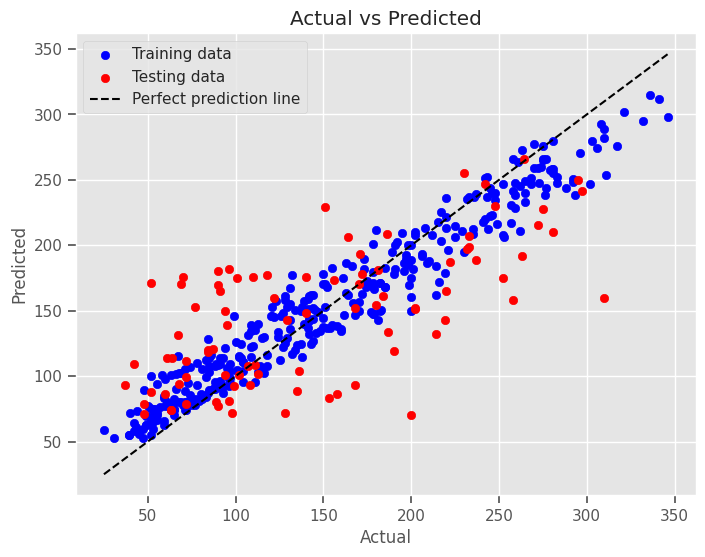

In [ ]:
plt.style.use('ggplot')

# Plot y_pred against y_train
plt.figure(figsize=(8, 6))

# On Data Training
plt.scatter(
    y_train,
    model.predict(X_train),
    color='blue',
    label='Training data'
)

# On Data Testing
plt.scatter(
    y_test,
    model.predict(X_test),
    color='red',
    label='Testing data'
)

# Benchmark Line
plt.plot(
    [min(y_train), max(y_train)],
    [min(y_train), max(y_train)],
    '--', color='black',
    label='Perfect prediction line'
)

plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()